# S&P 500 Index data from Yahoo finance
On the period January to October,2020

Apple company stock price

# Importing libraries to the notebook

In [1]:
import pandas as pd
from datetime import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from random import gauss
from optionprice import Option
import  scipy.stats as norm
%matplotlib inline


In [2]:
# We define our starting period from January to october,2020
Start=datetime(2020,1,1)
End=datetime(2020,10,1)

In [3]:
# Pulling our data via yahoo finance
Apple=yf.download('AAPL',Start,End)
Apple.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.192863,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.840042,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.122154,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.704819,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.358185,108872000


In [4]:
# saving all the data to csv
Apple.to_csv('C:/Users/Admin/Desktop/python/Apple.csv')

In [5]:
#Printing dataframe
dataframe=pd.read_csv('C:/Users/Admin/Desktop/python/Apple.csv',index_col=0,parse_dates=True)

In [6]:
#checking the first five elements
dataframe.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.192863,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.840042,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.122154,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.704819,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.358185,108872000


Text(0.5, 1.0, 'Adjusted prices of Apple stock prices')

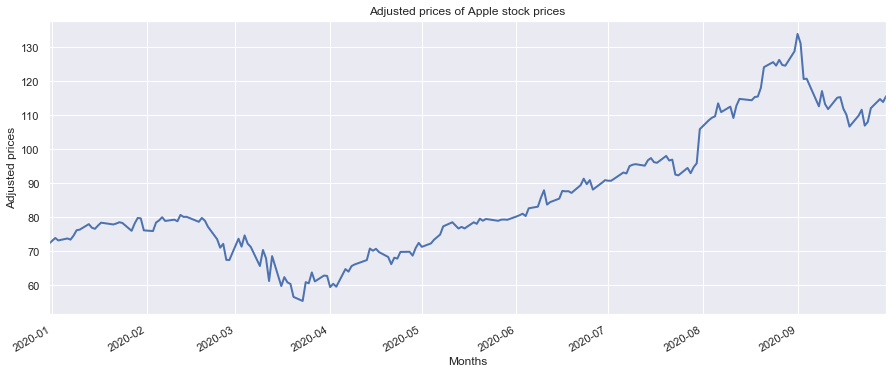

In [7]:
#visualization
sns.set(rc={'figure.figsize':(15,6)})
ax=dataframe['Adj Close'].plot(linewidth=2)
ax.set_ylabel("Adjusted prices")
ax.set_xlabel("Months")
ax.set_title("Adjusted prices of Apple stock prices")

In [8]:
# change in closing prices
change=dataframe['Adj Close'].pct_change()

Text(0, 0.5, 'frequency')

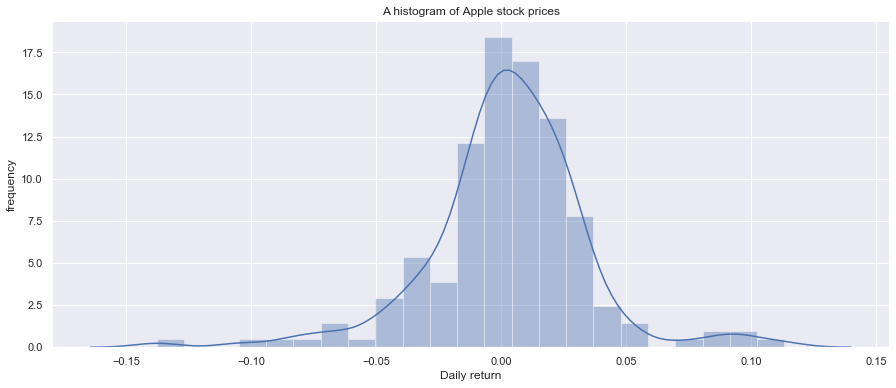

In [9]:
#computation of logarithmic returns of Apple
log_return=np.log(1+change)
#plot
sns.set(rc={'figure.figsize':(15,6)})
ax2=sns.distplot(log_return.iloc[1:])
ax2.set_title("A histogram of Apple stock prices")
ax2.set_xlabel("Daily return")
ax2.set_ylabel("frequency")

In [10]:
# compute the drift
u=log_return.mean()
variance=log_return.var()
drift=u-(0.5*variance)
drift


0.0019892193344091796

In [11]:
t=log_return.kurtosis()
t

3.654298601608065

In [12]:
# Volatility
volatility=log_return.std()
volatility

0.031693555366362806

# Methodology

•Design a derivative and its associated pricing value using different methods.

•Hints: Derivative can be any type, such as vanilla option, binary option etc.

•You need to choose at least two methods and compare the results, such as Binomial, BSM and MC simulation etc. 

•The process must be implemented via Python

# Vanilla option

In [13]:
# Initializing the vanilla option price
# spot price is 117.34
#strike price is 122
# riskfree rate is 0.0083
#volatility is 0.272
Vanilla_option= Option(european=True,kind='call',s0=117.34,k=122,
               start=datetime(2020,1,1),
               end=datetime(2020,10,1),sigma=0.272,r=0.0083,
               dv=0)
Vanilla_option

Type:           European
Kind:           call
Price initial:  117.34
Price strike:   122
Volatility:     27.200000000000003%
Risk free rate: 0.83%
Start Date:     2020-01-01
Expire Date:    2020-10-01
Time span:      274 days

In [14]:
#The default method is Black Scholes Merton method
# The BSM pricing of the option
price=Vanilla_option.getPrice()
price

9.345550569541444

In [15]:
#The Monte Carlo simulation method of pricing the option
price1=Vanilla_option.getPrice(method='MC',iteration=10000)
price1

8.889476252723734

# Analysis
 •Calculate and explain its Greeks for the risk management purpose. 
 
 •Hints: you need to provide at least five Greeks

In [16]:
import mibian as mb

In [17]:
#call gamma
c=mb.BS([117.34,122,0,274],volatility=0.272)
print(c.gamma)


7.337618489540644e-60


In [18]:
# Vega
def Vega(S,K,T,r,sigma):
        # S=Spot price
        # K=Strike price
        #T=Maturity time
        #r=riskfree rate
        #Sigma=implied volatility
        d1=(np.log(S/K)+(r +0.5*sigma**2)*T)/(sigma*np.sqrt(T))
        vega=S*np.sqrt(T)*norm.norm.cdf(d1,0.0,1.0)
        return vega         

In [19]:
p=Vega(117.34,122,0.833,0.0083,0.272)
p

53.3379586690583

In [20]:
# rho Call
def rho(S,K,T,r,sigma,option='call'):
    d1=(np.log(S/K)+(r +0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    if option=='put':
        rho=-K*T*np.exp(-r*T)*norm.norm.cdf(-d2,0.0,1.0)
    if option=='call':
        rho=K*T*np.exp(-r*T)*norm.norm.cdf(d2,0.0,1.0)
    return rho   

In [21]:
j=rho(117.34,122,0.833,0.0083,0.272)
j

40.37784840128642

In [22]:
#call Delta
c=mb.BS([117.34,122,0,274],volatility=0.272)
print(c.callDelta)


1.2234775035948422e-61


In [23]:
#  Call theta
def theta(S,K,T,r,sigma,option='call'):
    d1=(np.log(S/K)+(r +0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    if option=='put':
        theta=-(S*norm.norm.cdf(d1,0.0,1.0)*sigma)/2*np.sqrt(T)+r*K*np.exp(-r*T)*norm.norm.cdf(-d2,0.0,1.0)
    if option=='call':
        theta=-(S*norm.norm.cdf(d1,0.0,1.0)*sigma)/2*np.sqrt(T)-r*K*np.exp(-r*T)*norm.norm.cdf(d2,0.0,1.0)
    return theta
l=theta(117.34,122,0.833,0.0083,0.272)
l

-7.6562866787886605